### Transformation on Skewed Columns for Comparison and Highly Correlated Columns

#### Here data trasnformation will be done on skewed columns and highly correlated columns.

##### Correcting Skew
##### Key points to consider:
##### # Skewness
##### Spreadness of the Distribution
- If Skewness = 0, data is perfectly symmetrical / Normally Distributed
- If Skewness is less than -1 or greater +1, distribution is highly skewed
- If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
- If Skewness is between -0.5 and 0.5 then it is approximately symmetric  

#### Let's check the skew in the Administrative column using a Q-Q plot.

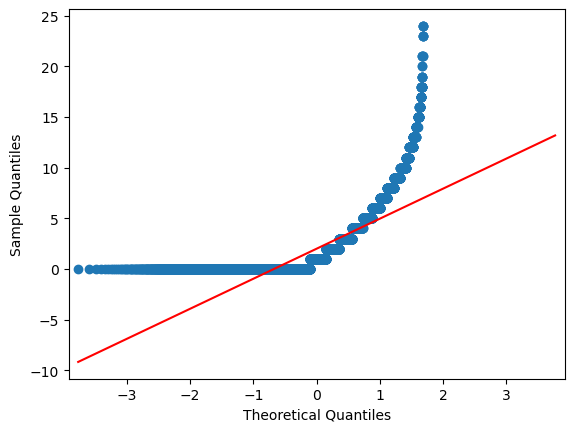

count    11760.000000
mean         2.308844
std          3.364905
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         24.000000
Name: administrative, dtype: float64

In [35]:

# q-q plot of Administrative:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

# scale Administrative: 
df = pd.read_csv('customer.csv')
qq_plot = qqplot(df['administrative'] , scale=1 ,line='q')
pyplot.show()
df['administrative'].describe()

#### The Administrative column skew is big, and has a big gap between the 3rd quartile and the max! Let's apply log transform to see if there is any difference:

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


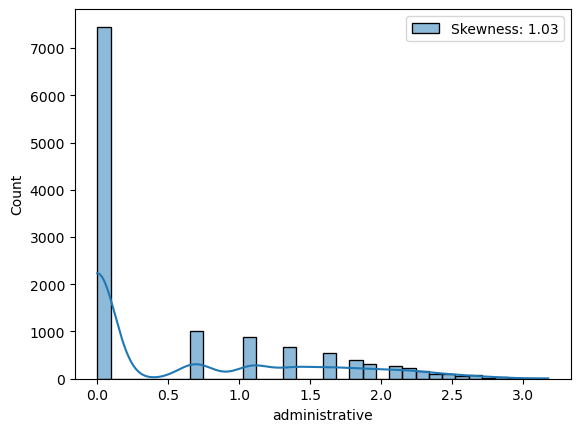

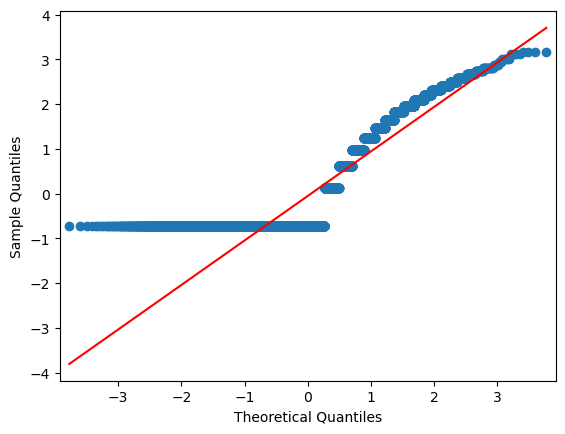

In [36]:
log_administrative = df['administrative'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative,label="Skewness: %.2f"%(log_administrative.skew()), kde=True )
t.legend()
qq_plot = qqplot(log_administrative , scale=1 ,line='q', fit=True)
plt.show()

#### Well, Log transform is able to reduce the positive high skew in the Administrative column to a moderate skew of 1.03 according to our key points above. This is acceptable as it is within the skew range of 0.5 to 1.

#### Let's apply log transform on other skewed columns Administrative_duration, informational, informational_duration, product_related, exit_rates, page_values, months, browser, and region are alos highly skewed like the Administrative column.

#### Log Transform for Administrative_duration column.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


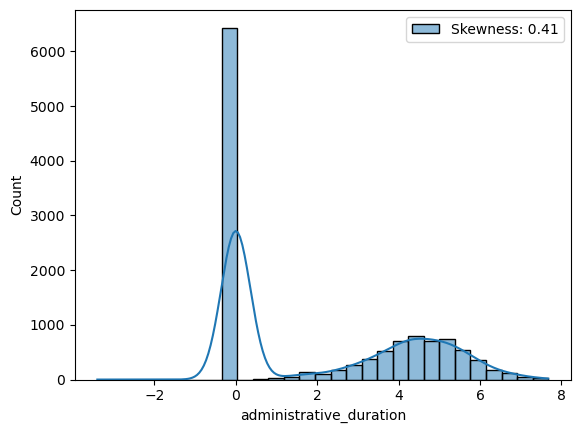

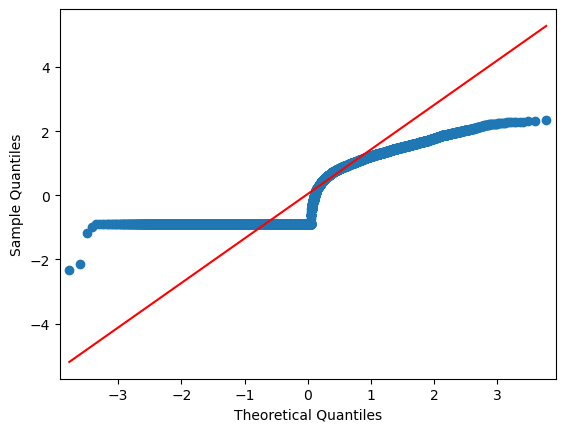

In [37]:
log_administrative_duration = df['administrative_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative_duration,label="Skewness: %.2f"%(log_administrative_duration.skew()), kde=True )
t.legend()
qq_plot = qqplot(log_administrative_duration , scale=1 ,line='q', fit=True)
plt.show()

#### Awesome, again log transform have greatly reduced the skew in the Administrative_duration column to 0.41 which is a normal distribution for skewness between 0 to 1, except for the outliers which will be look into later.

#### Log Transform for Informational column.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


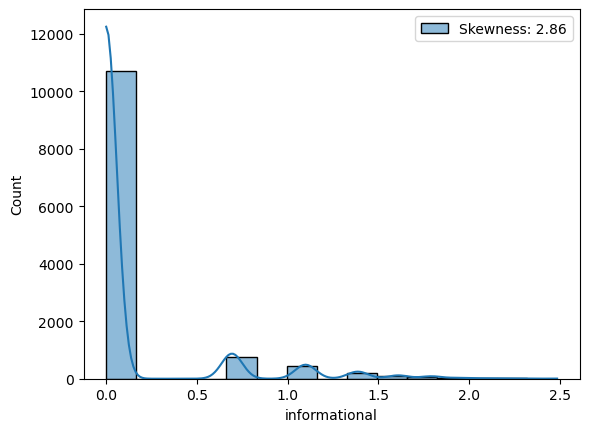

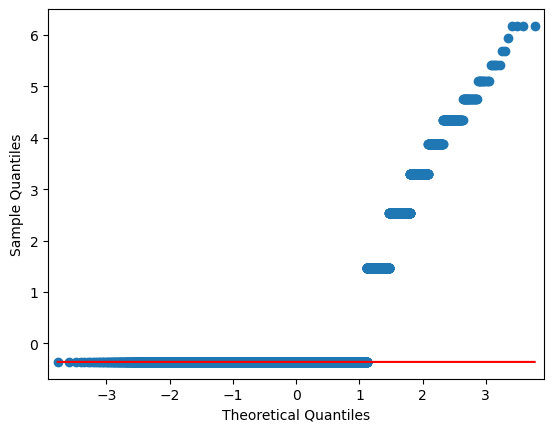

In [38]:
log_informational = df['informational'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_informational ,label="Skewness: %.2f"%(log_informational .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_informational  , scale=1 ,line='q', fit=True)
plt.show()

#### Unfortunately, log transform could not reduce the skew in the Informational column rather increases it to 2.86 which is not within the range. Therefore, we will have to apply other transformation. Let's try Box-cox transformation since it is applicable to positive values.

#### Box-cox Transform for Informational Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


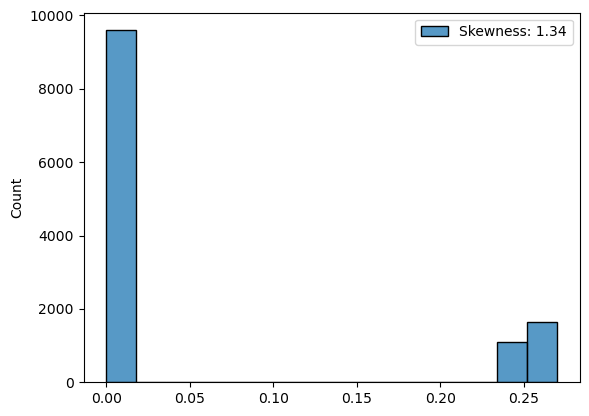

In [39]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'informational' column exists
if 'informational' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational'].fillna(df['informational'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational, _ = stats.boxcox(df["informational"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational = pd.Series(boxcox_informational)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational, label="Skewness: %.2f" % boxcox_informational.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational' does not exist in the DataFrame.")

#### Super!, Box-cox transform completely reduced the skewness from 2.86 to -0.00 which is a normal distribution.

#### Log Transform for Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


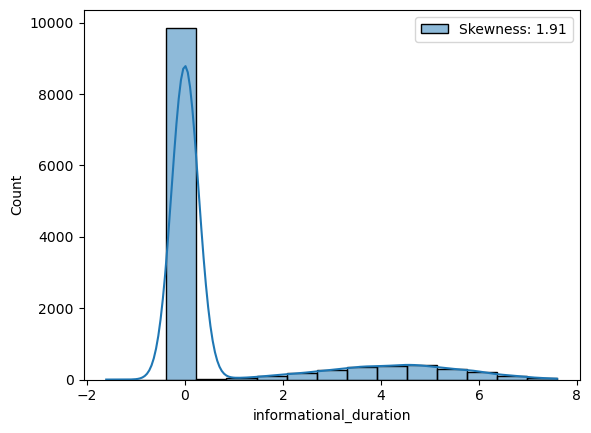

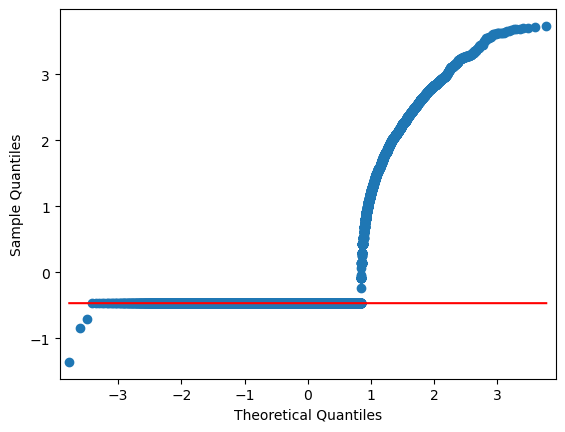

In [40]:
log_informational_duration = df['informational_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_informational_duration ,label="Skewness: %.2f"%(log_informational_duration .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_informational_duration, scale=1 ,line='q', fit=True)
plt.show()

#### Well, looks like the log transform didn't do good job in reducing the skewness in the Informational_duration. Let's apply box-cox transform and see what it can do.

#### Box-cox Transform on Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


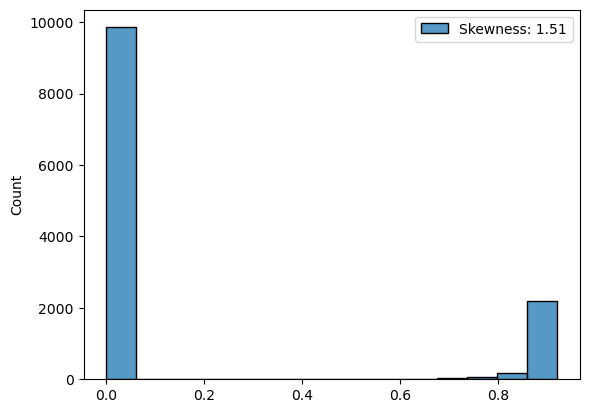

In [41]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational_duration, _ = stats.boxcox(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational_duration = pd.Series(boxcox_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational_duration, label="Skewness: %.2f" % boxcox_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

#### Box-cox transform was able to reduce the skewness to 1.52 which is still high. Let's try Yeojohnson transform.

#### Yeojohnson Transform for Informational_duration

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


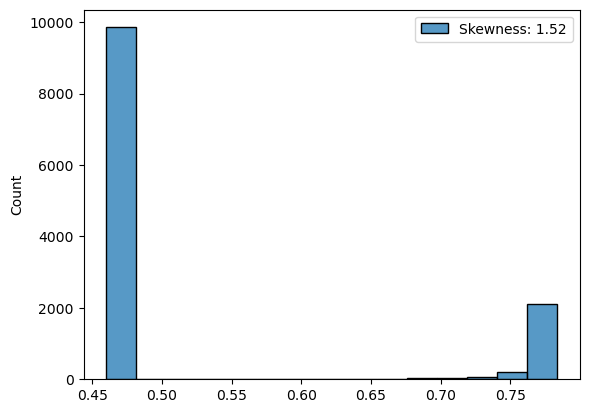

In [42]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    yeojohnson_informational_duration, _ = stats.yeojohnson(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    yeojohnson_informational_duration = pd.Series(yeojohnson_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(yeojohnson_informational_duration, label="Skewness: %.2f" % yeojohnson_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

#### Yeojohnson rather increases the skewness by 1 from 1.51 of box-cox transform to 1.52. Looks like there's not much can be done on this Informational_duration Column. We will adopt box-cox transform for this column since it is slightly lower than other transform methods.

#### Log Transformation on Weekend

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


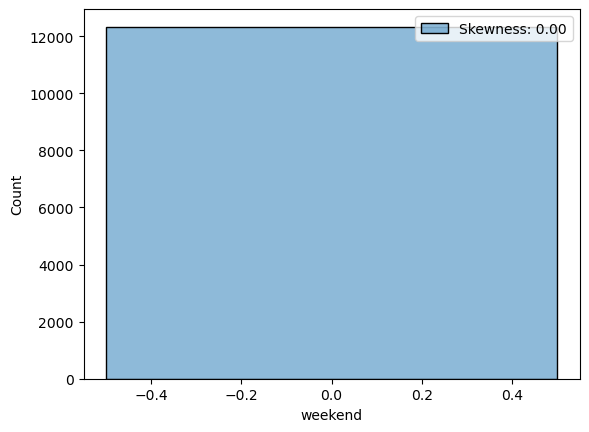

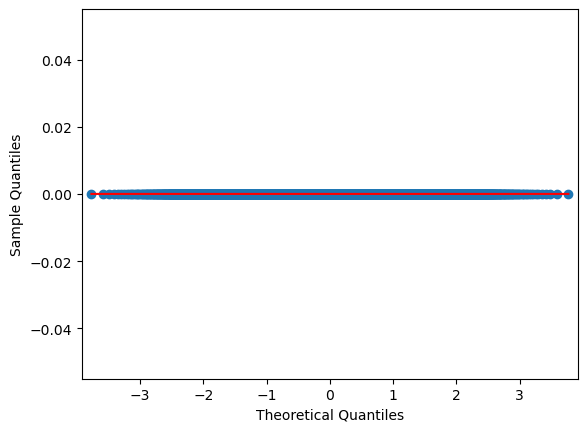

In [43]:
log_weekend = df['weekend'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_weekend ,label="Skewness: %.2f"%(log_weekend .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_weekend, scale=1 ,line='q', fit=True)
plt.show()

#### Applying log transformation on Weekend column generate Skewness of 0, data is perfectly symmetrical / Normally Distributed. Let's apply to revenue which is the same dataset with weekend.


#### Log Transformation on Revenue

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


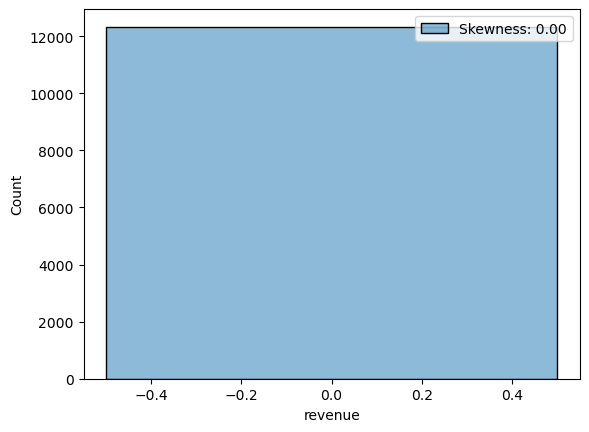

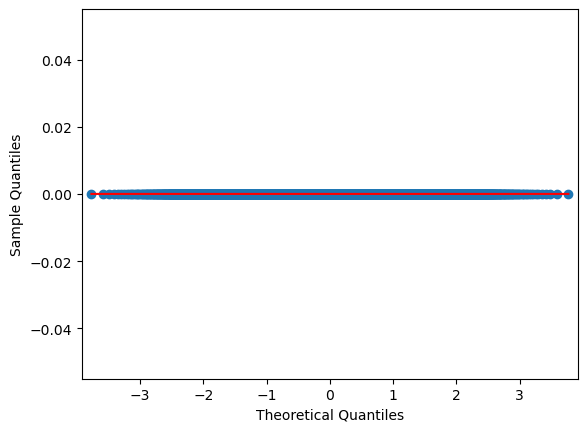

In [44]:
log_revenue = df['revenue'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_revenue ,label="Skewness: %.2f"%(log_revenue .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_revenue, scale=1 ,line='q', fit=True)
plt.show()

#### Excellent, log transformation on Revenue column as predicted generate Skewness of 0, data is perfectly symmetrical / Normally Distributed.

#### Log Transform on Product_related Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


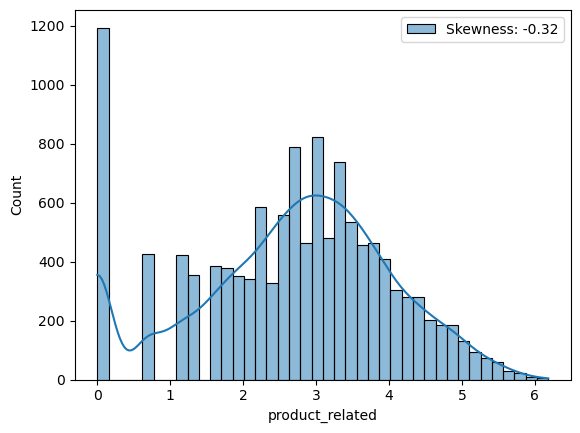

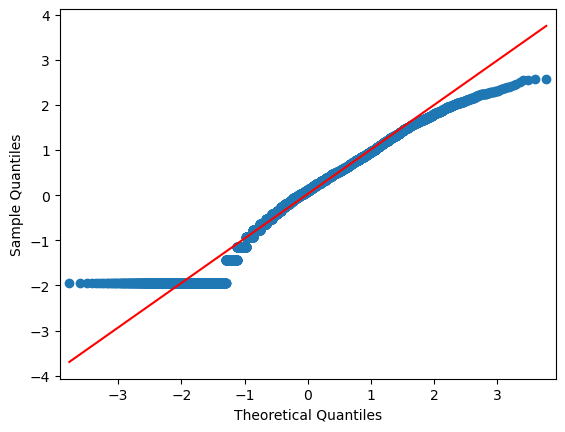

In [45]:
log_product_related = df['product_related'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_product_related ,label="Skewness: %.2f"%(log_product_related .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_product_related, scale=1 ,line='q', fit=True)
plt.show()

#### Again, log transform works well on Product_related column by reducing the skewness to -0.30 which is a normal distribution. Let's compare with box-cox transform

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


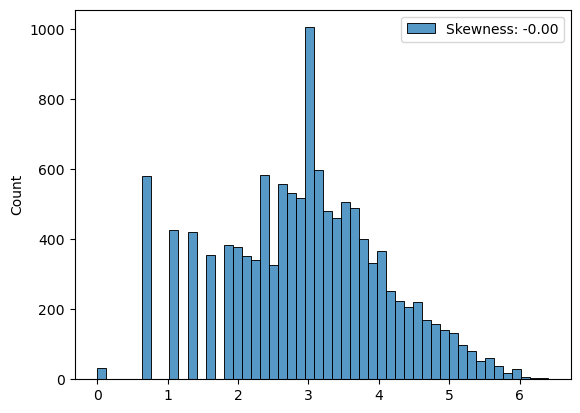

In [46]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Product_Related' column exists
if 'product_related' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['product_related'].fillna(df['product_related'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_product_related, _ = stats.boxcox(df["product_related"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_product_related = pd.Series(boxcox_product_related)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_product_related, label="Skewness: %.2f" % boxcox_product_related.skew())
    t.legend()
    plt.show()
else:
    print("Column 'product_related' does not exist in the DataFrame.")

#### Great! With Box-cox transform the skewness is completely reduced to zero giving us a perfect and normal data distribution. 

#### Log Transform for Exit_rates

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


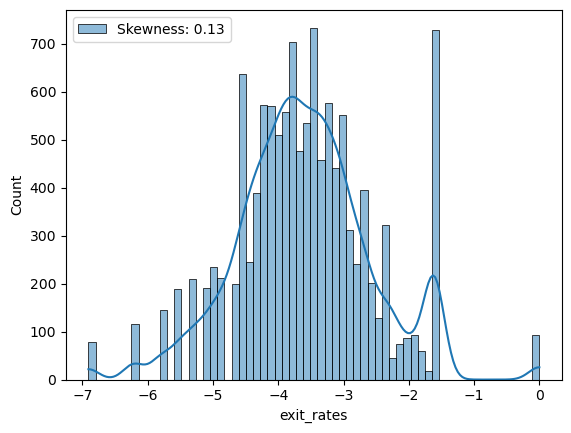

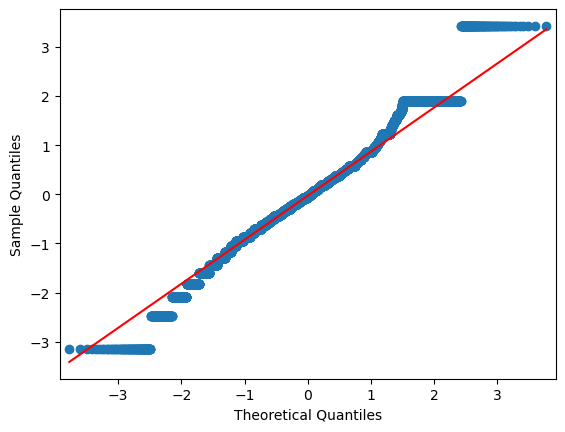

In [47]:
log_exit_rates = df['exit_rates'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_exit_rates ,label="Skewness: %.2f"%(log_exit_rates .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_exit_rates, scale=1 ,line='q', fit=True)
plt.show()

#### Excellent! Log transform did an amazing reduction of skewness on the Exit_rates column to 0.13.This is normal and acceptable. Lets's apply log transform on page-values column.

#### Log Transform on Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


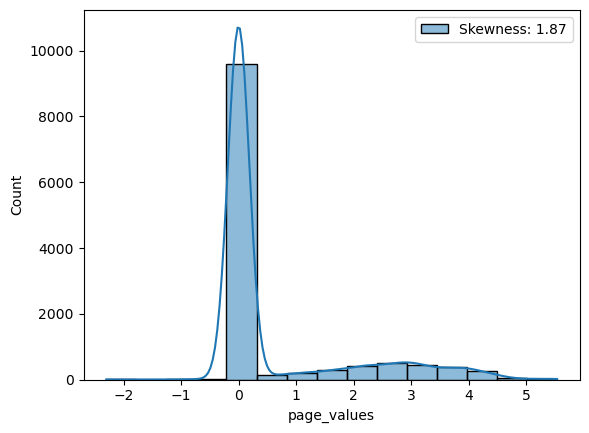

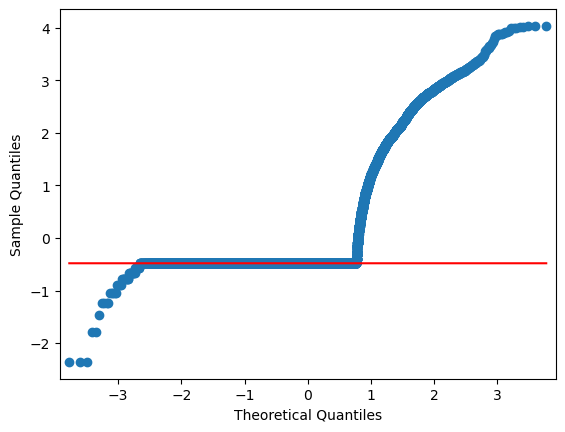

In [48]:
log_page_values = df['page_values'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_page_values  ,label="Skewness: %.2f"%(log_page_values  .skew()), kde=True )
t.legend()
qq_plot = qqplot(log_page_values , scale=1 ,line='q', fit=True)
plt.show()

#### Well, that didn't turn out well with the log transform on Page_values column. Skewness of 1.87 is high, let's apply box-cox transform.

#### Box-Cox Transform on Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


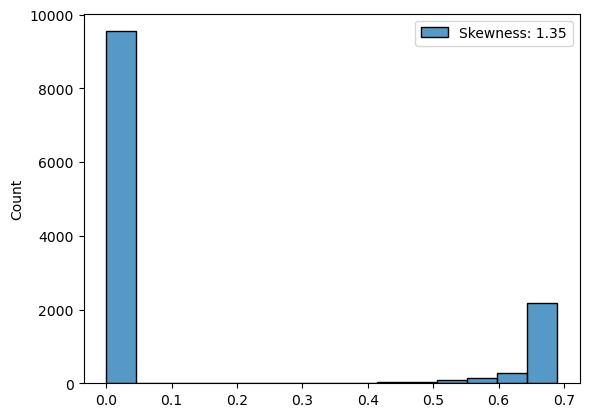

In [49]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_page_values, _ = stats.boxcox(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_page_values = pd.Series(boxcox_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_page_values, label="Skewness: %.2f" % boxcox_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

#### Atleast, Box-cox is able to reduce the skewness from 1.87 to 1.35 even it's still high. Let's apply YeoJohnson transform.

#### Yeojohnson Transform on Page_values column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


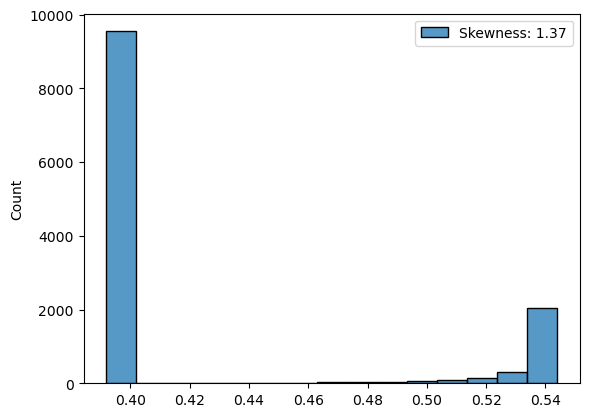

In [50]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    yeojohnson_page_values, _ = stats.yeojohnson(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    yeojohnson_page_values = pd.Series(yeojohnson_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(yeojohnson_page_values, label="Skewness: %.2f" % yeojohnson_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

#### Well, Yeojohnson transform didn't make any difference rather increases the skewness by 2 from 1.35 of box-cox transform to 1.37. At this point, not much can be done on the page_values except the outliers which will be look into later. Therefore, we will adopt the box-cox transform for the skewness reduction on page_values column because the skewness reduction in box-cox transform is slighlty lesser than other transform methods.

## Removing Outliers

####  In histograms, outliers can often be identified as isolated bars that are separated from the main cluster of data, indicating values that are significantly different from the majority. Let's visualized data on columns for outliers using histogram.

#### Histogram for Administrative Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


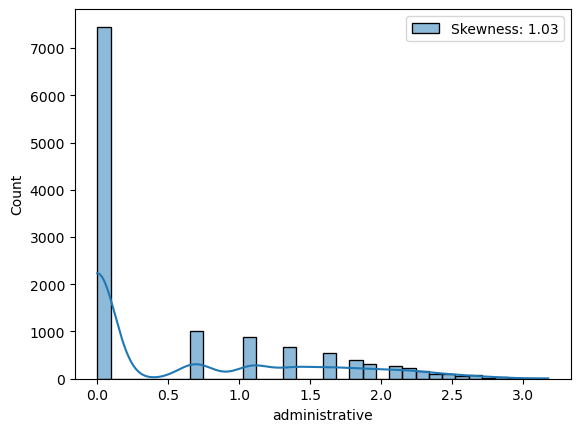

In [51]:
log_administrative = df['administrative'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative,label="Skewness: %.2f"%(log_administrative.skew()), kde=True )
t.legend()
plt.show()

##### In the above histogram for Administrative column, the outlier is visible at the far left (0.0, 7500).

#### Histogram for Administrative_duration Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


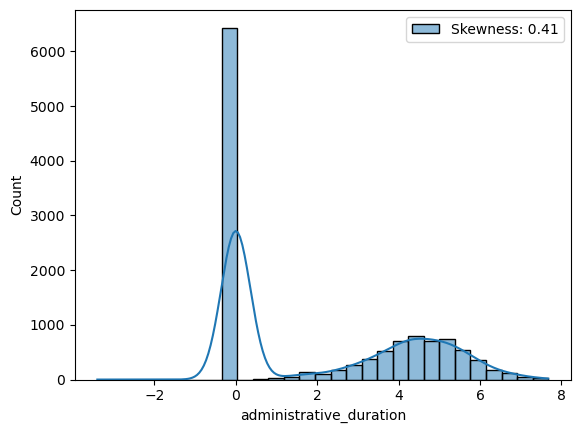

In [52]:
log_administrative_duration = df['administrative_duration'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_administrative_duration,label="Skewness: %.2f"%(log_administrative_duration.skew()), kde=True )
t.legend()
# qq_plot = qqplot(log_administrative_duration , scale=1 ,line='q', fit=True)
plt.show()

#### The outlier in the Administrative_duration column is the bar at the left (0,6500)

#### Histogram for Informational Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


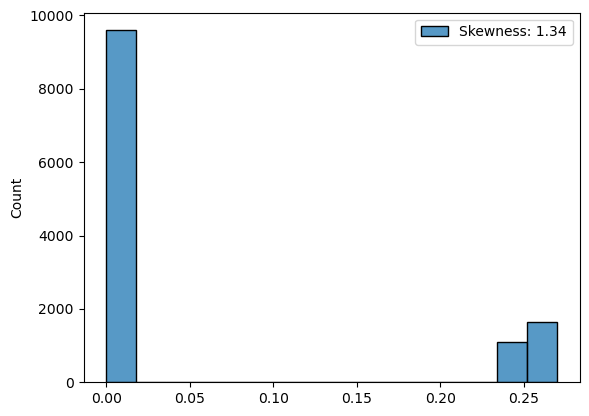

In [53]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'informational' column exists
if 'informational' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational'].fillna(df['informational'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational, _ = stats.boxcox(df["informational"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational = pd.Series(boxcox_informational)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational, label="Skewness: %.2f" % boxcox_informational.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational' does not exist in the DataFrame.")

#### This is a clear visibility of outlier on the Informational column, the bar at the far left (0.00, 900) is the outlier. 

#### Histogram for Informational_duration Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


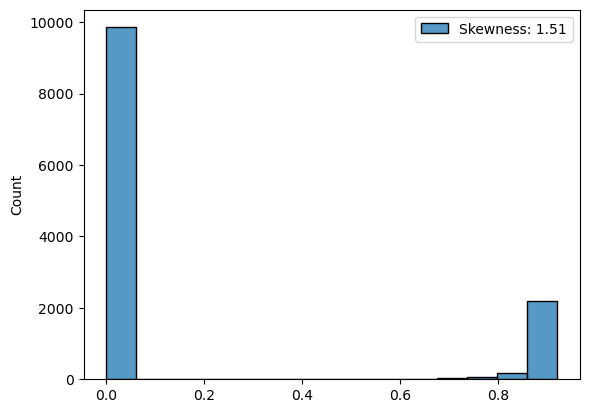

In [54]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Check if 'informational_duration' column exists
if 'informational_duration' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['informational_duration'].fillna(df['informational_duration'].median(), inplace=True)
    
  # Apply Box-Cox transformation
    boxcox_informational_duration, _ = stats.boxcox(df["informational_duration"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_informational_duration = pd.Series(boxcox_informational_duration)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_informational_duration, label="Skewness: %.2f" % boxcox_informational_duration.skew())
    t.legend()
    plt.show()
else:
    print("Column 'informational_duration' does not exist in the DataFrame.")

#### Same as the Informational column, the outlier is the bar at the far left (0.0, 9950). This bar is isolated from the cluster bars at the far right.

#### Histogram of Product_related Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


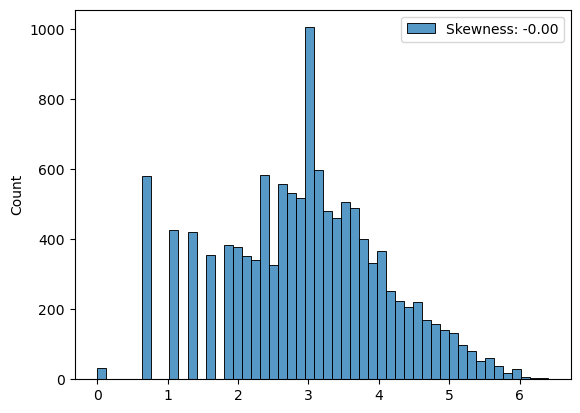

In [55]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Product_Related' column exists
if 'product_related' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['product_related'].fillna(df['product_related'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_product_related, _ = stats.boxcox(df["product_related"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_product_related = pd.Series(boxcox_product_related)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_product_related, label="Skewness: %.2f" % boxcox_product_related.skew())
    t.legend()
    plt.show()
else:
    print("Column 'product_related' does not exist in the DataFrame.")

#### The histogram for product_related column shows an isolated bar at the are left (0,10) which is the outlier.

#### Histogram for Exit_rates Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


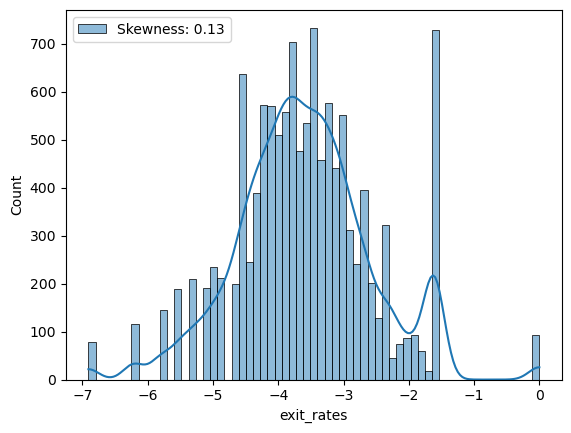

In [56]:
log_exit_rates = df['exit_rates'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_exit_rates ,label="Skewness: %.2f"%(log_exit_rates .skew()), kde=True )
t.legend()
plt.show()

#### Here we have two outliers which are the two bars at the far left (-7,90) and (0,100) on the exit_rates column.

#### Histogram for Page_values Column

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


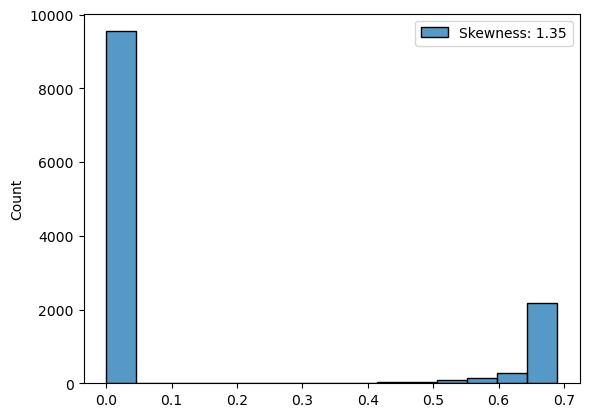

In [57]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'page_values' column exists
if 'page_values' in df.columns:
    # Handle any missing values, if any, by filling with the median or another strategy
    df['page_values'].fillna(df['page_values'].median(), inplace=True)
    
    # Apply Box-Cox transformation
    boxcox_page_values, _ = stats.boxcox(df["page_values"] + 1)  # Add 1 to avoid zero values
    
    # Convert to Pandas Series
    boxcox_page_values = pd.Series(boxcox_page_values)
    
    # Plot the distribution with Seaborn
    t = sns.histplot(boxcox_page_values, label="Skewness: %.2f" % boxcox_page_values.skew())
    t.legend()
    plt.show()
else:
    print("Column 'page_values' does not exist in the DataFrame.")

#### Great! We can identify the outlier as the isolated bar(0.0, 9950) on the dar left of the page_values column.

## Transformation/Removal of Outliers

#### Now that the outliers has been identified on the affected columns, next is to either transform or remove the outliers in those columns. We will use two different methods; Interquartile(IQR) and Box Plot methods for better visualization. Let's start with the Administrative Column using IQR method to remove the outlier and then visualized the output on an histogram .

#### IQR and Histogram for Administrative Column

nan


<Axes: >

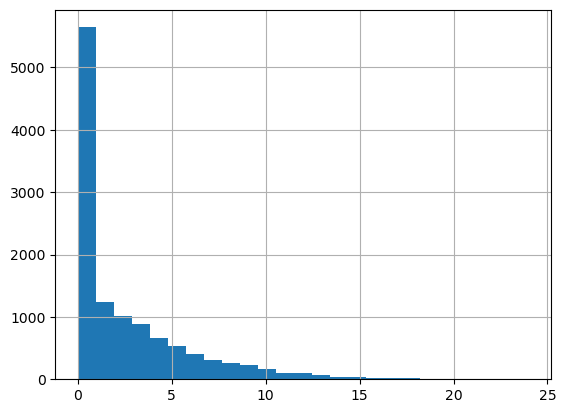

In [58]:
# IQR
Q1 = np.percentile(df['administrative'], 25, method='midpoint')
Q3 = np.percentile(df['administrative'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['administrative'].hist(bins=25)


#### Great! The histogram for the administrative column shows a normal distribution with no outliers. No isolated bar, all bars are clustered together which means outliers has been successfully removed.

#### Box Plot for Administrative_duration Column

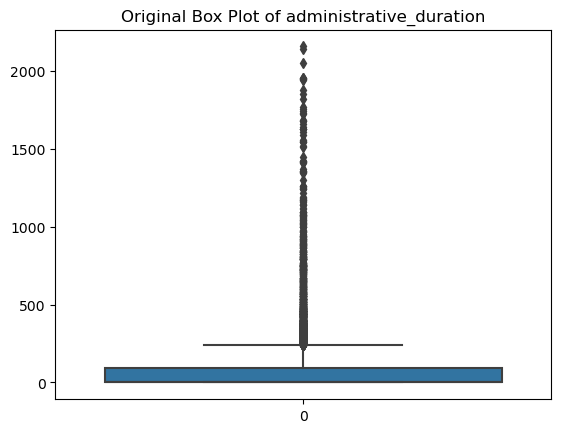

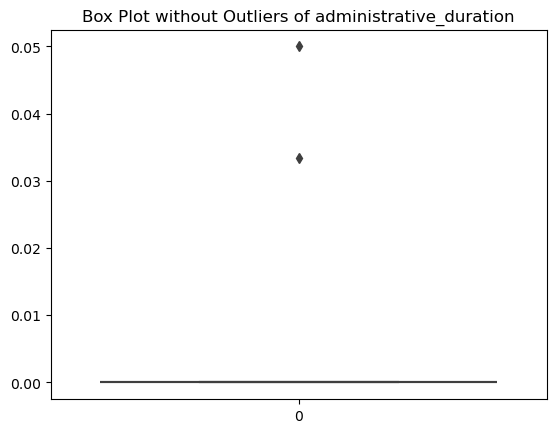

In [59]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'administrative_duration', threshold_value)

#### IQR and Histogram for Administrative _duration Column

nan


<Axes: >

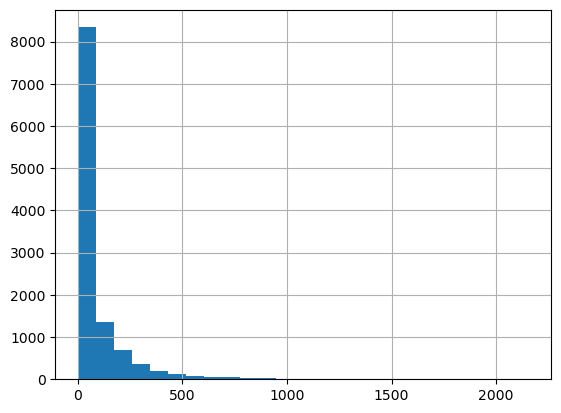

In [60]:
# IQR
Q1 = np.percentile(df['administrative_duration'], 25, method='midpoint')
Q3 = np.percentile(df['administrative_duration'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['administrative_duration'].hist(bins=25)

#### Comparing the two methods plots above box plot and IQR after the removal of outlier, the histogram from the IQR method present a better visualization for a successful removal of outlier. As mentioned before all bars are clustered together, no isolated bar therefore, no outliers.

#### IQR and Histogram Plot for Informational Column

0.0


<Axes: >

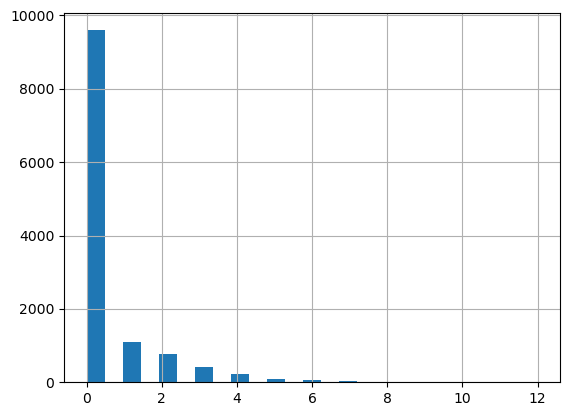

In [61]:

# IQR
Q1 = np.percentile(df['informational'], 25, method='midpoint')
Q3 = np.percentile(df['informational'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['informational'].hist(bins=25)

#### The Informational column on the histogram shows an evenly distributed bars and not isolated bar. This means the outliers have been successfully removed using the IQR method

#### IQR and Histogram for Informational_duration Column

nan


<Axes: >

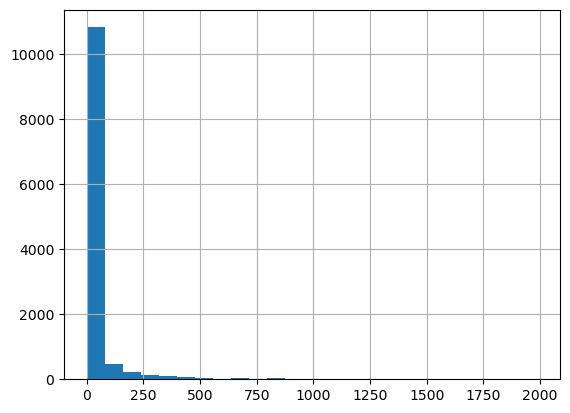

In [62]:
# IQR
Q1 = np.percentile(df['informational_duration'], 25, method='midpoint')
Q3 = np.percentile(df['informational_duration'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['informational_duration'].hist(bins=25)

#### Outliers in the informational_duration has not been completely removed but corrected as shown in the histogram above. The two isolated bars (0,750), (0,800) are not too far off from the clustered bars compare to previous shape in after skew transformation.

#### IQR and Histogram for Product_related Column.

nan


<Axes: >

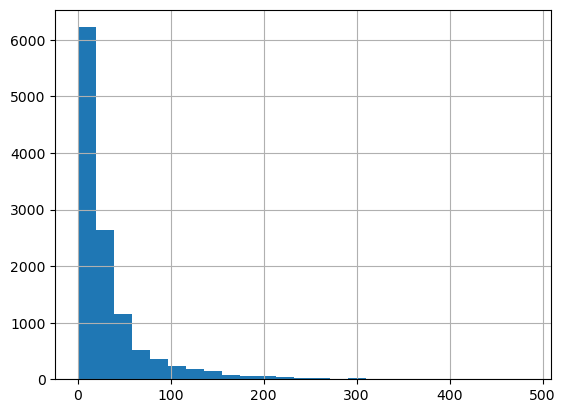

In [63]:
# IQR
Q1 = np.percentile(df['product_related'], 25, method='midpoint')
Q3 = np.percentile(df['product_related'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['product_related'].hist(bins=25)

#### IQR method has successfully corrected the outliers in the Product_related columns. Here, all bars are clustered together except for the bar at (300,0) which is not too far off.

#### IQR and Histogram for Exit_rates Column

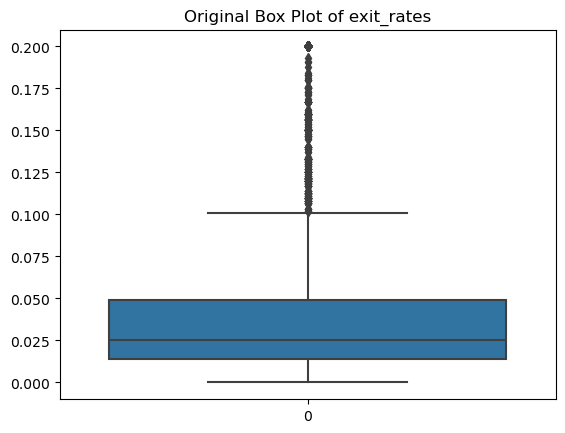

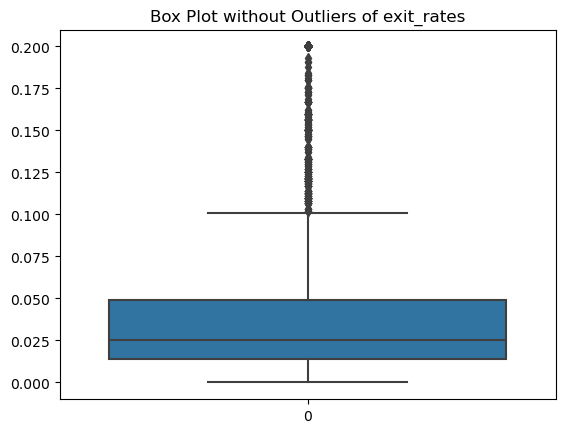

In [64]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'exit_rates', threshold_value)

0.035


<Axes: >

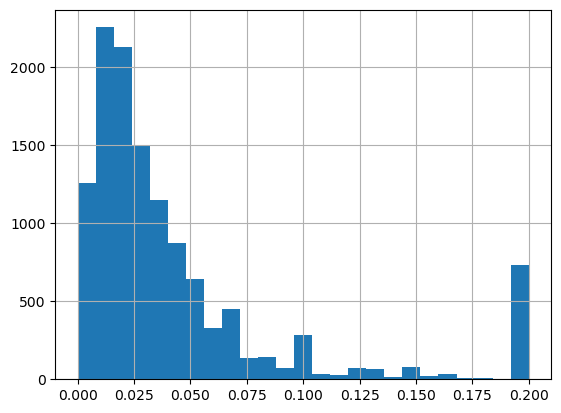

In [65]:
# IQR
Q1 = np.percentile(df['exit_rates'], 25, method='midpoint')
Q3 = np.percentile(df['exit_rates'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['exit_rates'].hist(bins=25)

####  Comparing the two methods the box plot and IQR, there is no difference in the plot before and after removal of outlier whereas, the IQR was able to correct the outliers mostly on the left hand where all the bars are clustered together as shown in the histogram. 

#### IQR and Histogram for Page_values Column

0.0


<Axes: >

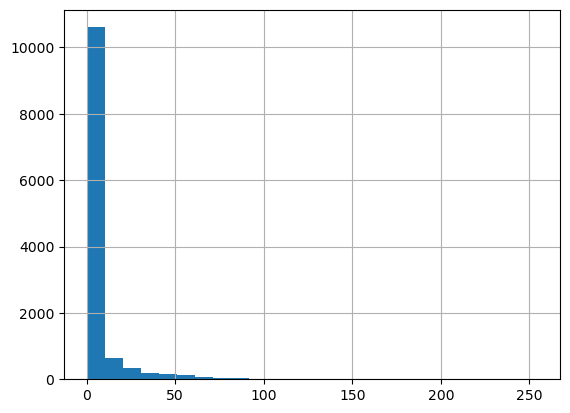

In [66]:
# IQR
Q1 = np.percentile(df['page_values'], 25, method='midpoint')
Q3 = np.percentile(df['page_values'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

df['page_values'].hist(bins=25)

#### Box Plot for Page_values Column

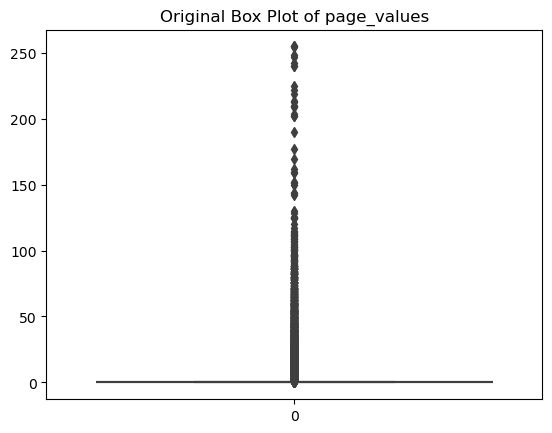

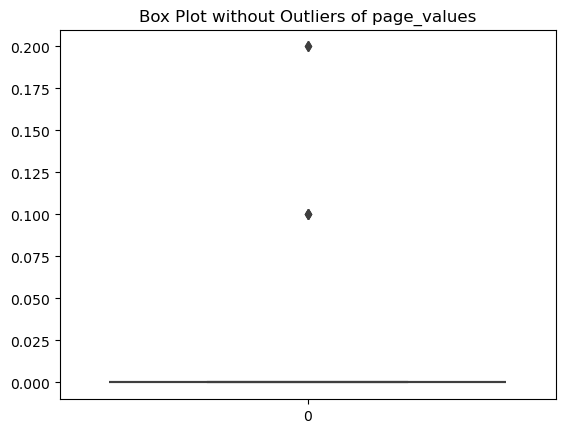

In [67]:
df = pd.read_csv('customer.csv')
import seaborn as sns
import matplotlib.pyplot as plt
 
 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.20
 
no_outliers = removal_box_plot(df, 'page_values', threshold_value)

#### The two methods shows a successfully removal of outliers on the page_values column. This is better visualized on the histogram as all the bars are clustered together with no isolated bars.

#### HIGHLY CORRELATED COLUMNS

##### Here correlated columns will be computed and visualized, and highly correlated columns will be dropped. First, let's compute and visualized correlated columns using heatmap plot.

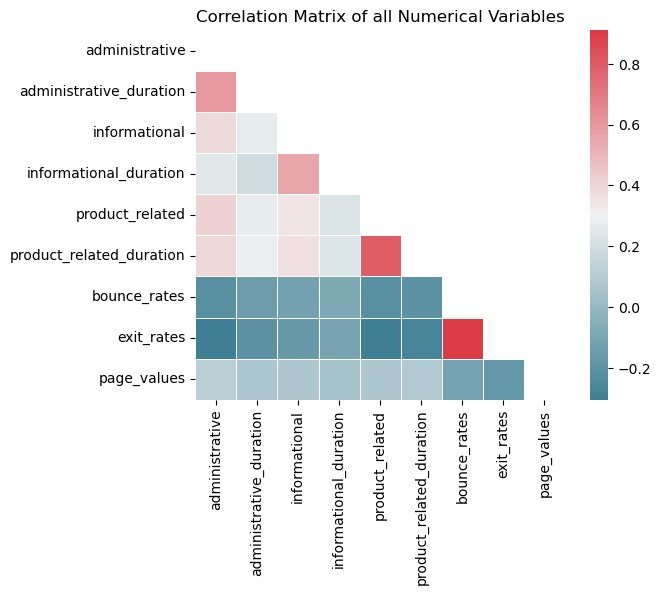

In [76]:
df = pd.read_csv('customer.csv')

# Identify and select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the colormap for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

#### From the above heatmap, any columns above 0.6 threshold are consider to be highly correlated and two columns product_related_duration and exit_rates are above 0.6 threshold which are considered to be highly correlated. Let's drop the highly correlated columns in the dataset.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('customer.csv')
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. 

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    # Identify and select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x
print("Removing Correlated Features")
remove_collinear_features(df.drop(['page_values'],axis=1),0.75)


Removing Correlated Features
Removed Columns {'exit_rates', 'product_related_duration'}


,administrative,administrative_duration,informational,informational_duration,product_related,bounce_rates,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.000000,0,0.00,4.0,0.2000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.000000,0,0.00,26.0,0.0000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.400000,0,0.00,19.0,0.0396,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.000000,0,0.00,20.0,0.0248,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.000000,0,0.00,33.0,0.0141,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,NaN,134.000000,4,112.22,48.0,0.0030,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,NaN,1,0.00,67.0,0.0276,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.000000,0,0.00,13.0,0.0000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False
12328,5.0,98.000000,0,0.00,46.0,0.0442,Sep,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False


#### The table above shows exit_rates and product_related_duration columns are removed from the dataset based on the threshold of 0.75 for highly correlated columns.
